# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Loading the Dataset:

In [2]:
df = pd.read_csv('telco_churn_dataset.csv')


# Exploratory Data Analysis (EDA):

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.rename(columns={"customerID": "Customer_ID", "gender": "Gender", "SeniorCitizen": "Senior_Citizen",
                   "PhoneService": "Phone_Service", "MultipleLines": "Multiple_Lines",
                   "InternetService": "Internet_Service", "OnlineSecurity": "Online_Security",
                   "OnlineBackup": "Online_Backup", "DeviceProtection": "Device_Protection",
                   "TechSupport": "Tech_Support", "StreamingTV": "Streaming_TV",
                   "StreamingMovies": "Streaming_Movies", "PaperlessBilling": "Paper_less_Billing",
                   "PaymentMethod": "Payment_Method", "MonthlyCharges": "Monthly_Charges",
                   "TotalCharges": "Total_Charges"}, inplace=True)

In [8]:
df.columns

Index(['Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paper_less_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

Customer_ID            object
Gender                 object
Senior_Citizen          int64
Partner                object
Dependents             object
tenure                  int64
Phone_Service          object
Multiple_Lines         object
Internet_Service       object
Online_Security        object
Online_Backup          object
Device_Protection      object
Tech_Support           object
Streaming_TV           object
Streaming_Movies       object
Contract               object
Paper_less_Billing     object
Payment_Method         object
Monthly_Charges       float64
Total_Charges          object
Churn                  object
dtype: object

In [10]:
df["Customer_ID"]

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: Customer_ID, Length: 7043, dtype: object

In [11]:
df.isnull()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Customer_ID           0
Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
tenure                0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paper_less_Billing    0
Payment_Method        0
Monthly_Charges       0
Total_Charges         0
Churn                 0
dtype: int64

       Senior_Citizen       tenure  Monthly_Charges
count     7043.000000  7043.000000      7043.000000
mean         0.162147    32.371149        64.761692
std          0.368612    24.559481        30.090047
min          0.000000     0.000000        18.250000
25%          0.000000     9.000000        35.500000
50%          0.000000    29.000000        70.350000
75%          0.000000    55.000000        89.850000
max          1.000000    72.000000       118.750000


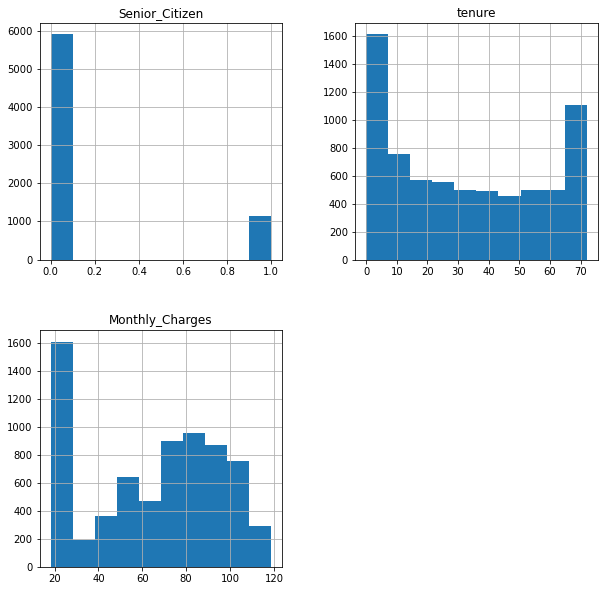

In [13]:
# Data Statistics
print(df.describe())



# Data Distributions
df.hist(figsize=(10, 10))
plt.show()


In [14]:
# Handle Missing Values (if any)
df = df.dropna()

# Convert Categorical Variables into Numerical Format
df_encoded = pd.get_dummies(df)


# visualization

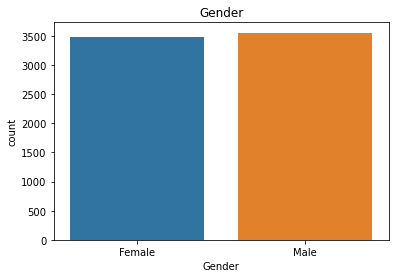

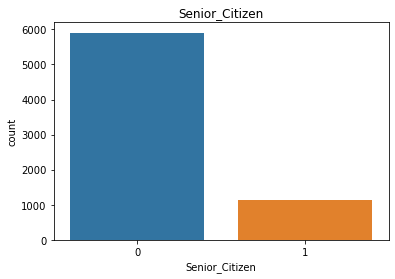

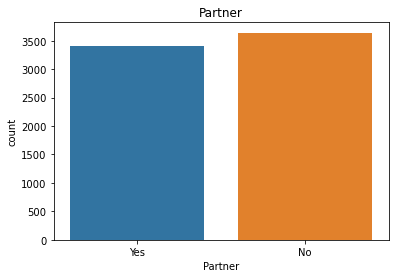

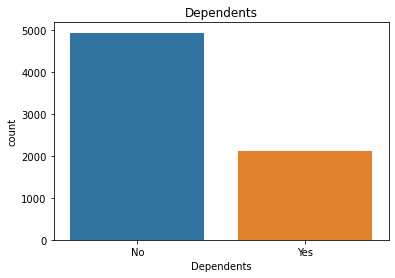

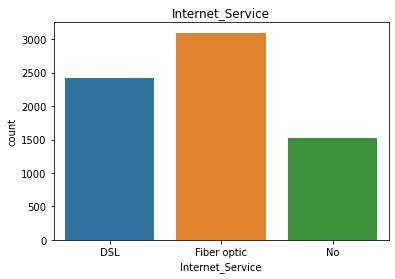

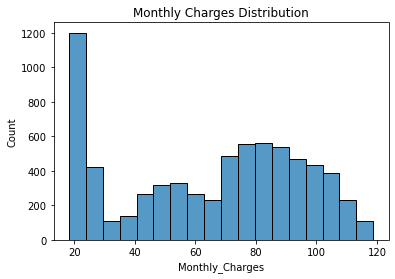

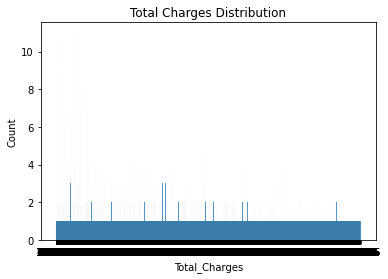

In [16]:
import seaborn as sns

# Select columns to visualize
columns_to_visualize = ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Internet_Service']

# Visualize categorical columns
for column in columns_to_visualize:
    sns.countplot(x=column, data=df)
    plt.title(column)
    plt.show()

# Visualize numerical columns
sns.histplot(x='Monthly_Charges', data=df)
plt.title('Monthly Charges Distribution')
plt.show()

sns.histplot(x='Total_Charges', data=df)
plt.title('Total Charges Distribution')
plt.show()


In [17]:
df.columns

Index(['Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paper_less_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [18]:
# Define Features (X) and Target (y)
X = df[['Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
        'tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
        'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
        'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paper_less_Billing',
        'Payment_Method', 'Monthly_Charges', 'Total_Charges']]
y = df['Churn']

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
df.dtypes

Customer_ID           category
Gender                  object
Senior_Citizen           int64
Partner                 object
Dependents              object
tenure                   int64
Phone_Service           object
Multiple_Lines          object
Internet_Service        object
Online_Security         object
Online_Backup           object
Device_Protection       object
Tech_Support            object
Streaming_TV            object
Streaming_Movies        object
Contract                object
Paper_less_Billing      object
Payment_Method          object
Monthly_Charges        float64
Total_Charges          float64
Churn                   object
dtype: object

In [22]:
# Convert 'Total_Charges' column to numeric type
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')

# Check the data type of the 'Total_Charges' column after conversion
print(df['Total_Charges'].dtype)


float64


In [24]:
# Convert 'Customer_ID' column to categorical data type
df['Customer_ID'] = df['Customer_ID'].astype('category')


In [29]:
print(df['Customer_ID'].unique())



['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', ..., '6840-RESVB', '2234-XADUH', '4801-JZAZL', '8361-LTMKD', '3186-AJIEK']
Length: 7043
Categories (7043, object): ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', ..., '9992-RRAMN', '9992-UJOEL', '9993-LHIEB', '9995-HOTOH']


In [32]:

# from sklearn.linear_model import LogisticRegression

# # 1. Model Development
# model = LogisticRegression()

# # 2. Model Training
# model.fit(X_train, y_train)

# # 3. Model Prediction
# y_pred = model.predict(X_test)

# # 4. Model Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

# # 5. Interpretation and Insights
# importance = model.coef_[0]
# feature_names = X.columns

# # Create a DataFrame of feature importance
# feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
# feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# # Print the top features
# print(feature_importance.head())
